# Mapamundi correlaciones

C:\Users\juanc\AppData\Local\Temp\ipykernel_10292\3334391754.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


<Axes: >

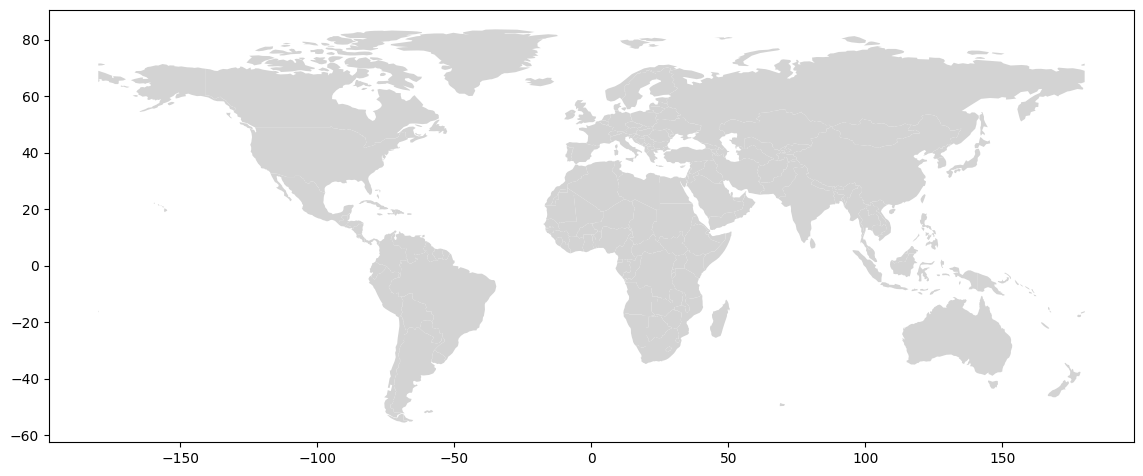

In [1]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name!="Antarctica")]

# Prepare the map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey')


In [2]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv("Df_Correlacion.csv", sep=";", encoding="utf-8")
df.rename(columns={"Unnamed: 0": "Nacionalidad"}, inplace=True)

paises = pd.read_csv("paises.csv", sep=",", encoding = "utf-8")

df

,Nacionalidad,Construccion,Industria,Primario,Servicios
0,Afganistán,-0.038930,-0.087710,-0.086712,0.126951
1,Albania,0.158400,-0.282747,0.035025,0.201210
2,Alemania,-0.083057,-0.381634,-0.073590,0.401350
3,Andorra,0.005735,-0.192325,0.014915,0.167443
4,Angola,-0.094147,-0.047442,0.016203,0.061640
...,...,...,...,...,...
112,Ucrania,0.330628,-0.095001,0.103441,-0.044956
113,Uruguay,0.206383,-0.327082,-0.003716,0.245446
114,Uzbekistán,0.080048,-0.182031,-0.012113,0.150180
115,Venezuela,-0.187124,-0.409065,-0.127851,0.477219


In [6]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [8]:
# Merge with the GeoPandas shapefile using ISO_A3 codes
world_data = world.merge(df, left_on="name", right_on=" name_x", how="left")

world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Nacionalidad,Construccion,Industria,Primario,...,nom_x,iso2_x,iso3_x,phone_code_x,nombre_y,name_y,nom_y,iso2_y,iso3_y,phone_code_y
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canadá,-0.137087,-0.306211,-0.086781,...,Canada,CA,CAN,1,Canadá,Canada,Canada,CA,CAN,1
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",Estados Unidos de América,-0.231728,-0.328269,-0.073998,...,États-Unis d'Amérique,US,USA,1,Estados Unidos de América,United States of America,États-Unis d'Amérique,US,USA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,0.271657,-0.275783,0.068979,...,Serbie,RS,SRB,381,Serbia,Serbia,Serbie,RS,SRB,381
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

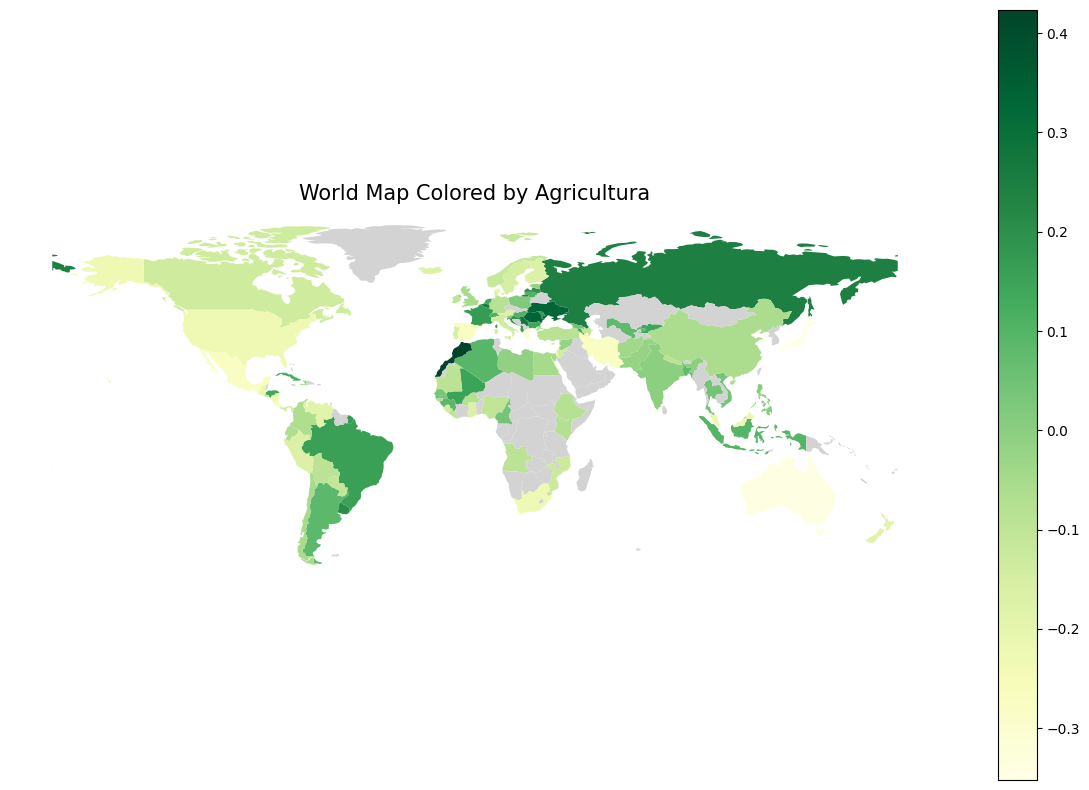

In [9]:
# Plot the world map with colors based on the 'Agricultura' column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.plot(
    column='Construccion',  # Use the Agricultura column to color countries
    cmap='YlGn',          # Colormap (e.g., 'YlGn', 'viridis', etc.)
    legend=True,          # Show a legend
    missing_kwds={
        "color": "lightgrey",  # Color for countries without data
        "label": "No Data",
    },
    ax=ax
)

# Add title and other map features
ax.set_title('World Map Colored by Agricultura', fontsize=15)
ax.axis('off')  # Turn off axis

# Show the map
plt.show